# INTERN ON LetsGrowMore(LGM)
## Beginner Level Task:
### Task no. 02 - Stock Market Prediction And Forecasting Using Stacked LSTM
Dataset from url : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv# 

# Abstract :
This project focuses on techniques and tools for handling Time Series Datasets. Main aim of this project is to make Stock Market Prediction and Forecasting using Stacked LSTM.

Long short-term memory (LSTM) is an artificial neural network used in the fields of artificial intelligence and deep learning.

It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. LSTM has feedback connections, i.e., it is capable of processing the entire sequence of data, apart from single data points such as images.

## Two approaches for solving this problem
i) Univariate Time Series Analysis : univariate time series model here means that there are only one dependent variable on the time series model

ii) Multivariate Time Series Analysis: it consist of more than one time-dependent variable and each variable depends not only on its past values but also has some dependency on other variables. 

# STEPS :
1) Importing Libraries and Loading data

2) Cleaning data and sorting data by date.

3) Applying univariate approch by selecting Closing Price as target variables.

4) Exploration and Analysis of Datasets.

5) Preprocessing by MinMax Scaler.

6) Preparing train and test datasets. 

# Let's Dive into the project
## Step-1: Importing required important libraries and loading dataset...

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Loading dataset

url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
tataglobal_df = pd.read_csv(url)
tataglobal_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [17]:
tataglobal_df.shape

(2035, 8)

In [18]:
tataglobal_df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [19]:
tataglobal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [20]:
tataglobal_df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [21]:
tataglobal_df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [22]:
tataglobal_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


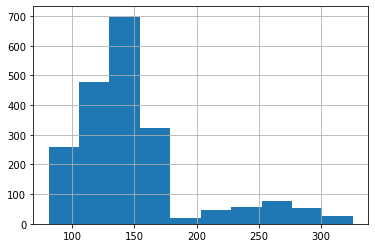

In [23]:
tataglobal_df.Close.hist();

# Parsing Dates
When we work with time series data, we want to enrich the time & date component as much as possible

We can do that by telling pandas which our column has dates in it using the parse_dates parameters

In [24]:
# Imoporting data again but this time parse dates

df = pd.read_csv(url, 
                 parse_dates=["Date"])
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [25]:
df.Date.dtype

dtype('<M8[ns]')

In [26]:
tataglobal_df.Date.dtype

dtype('O')

In [27]:
tataglobal_df.Date.head()

0    2018-09-28
1    2018-09-27
2    2018-09-26
3    2018-09-25
4    2018-09-24
Name: Date, dtype: object

In [28]:
df.Date.head()

0   2018-09-28
1   2018-09-27
2   2018-09-26
3   2018-09-25
4   2018-09-24
Name: Date, dtype: datetime64[ns]

<M8[ns] is equivalent to datetime64[ns]

# Step-2: Data Cleaning and Sorting by date from oldest to newest data...

In [29]:
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [30]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [31]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [32]:
# Sort Dataframe in date order

df.sort_values(by=["Date"], inplace=True, ascending=True)
df.Date.head()

2034   2010-07-21
2033   2010-07-22
2032   2010-07-23
2031   2010-07-26
2030   2010-07-27
Name: Date, dtype: datetime64[ns]

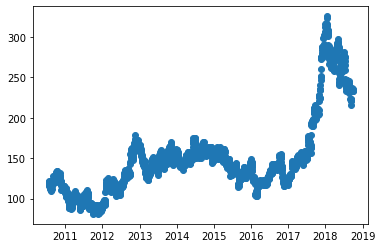

In [33]:
# Let's visualize closing price vs Date... 


fig, ax = plt.subplots()
ax.scatter(df.Date, df.Close);

In [34]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


# Make a copy of the original DataFrame

It is better to save our original database and make unchanged.

For changing lets make its copy

In [35]:
copy_df = df.copy()
copy_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [36]:
copy_df.reset_index(inplace =True)
copy_df

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...,...
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [37]:
copy_df.drop("index", axis=1, inplace=True)

In [38]:
copy_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
2030,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [39]:
# Let's see correlation matrix...
copy_df.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


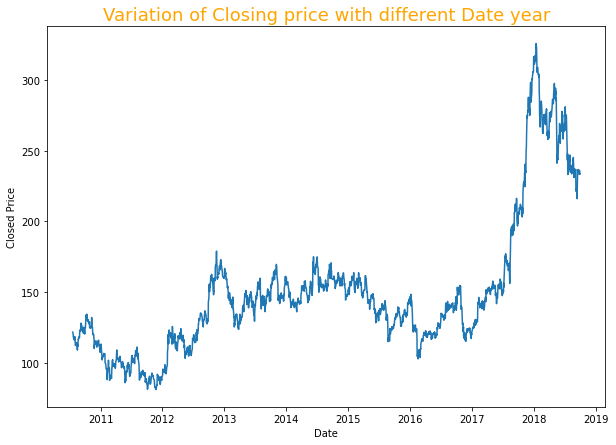

In [40]:
plt.figure(figsize=(10,7))
plt.plot(copy_df["Date"],
         copy_df["Close"])
plt.xlabel("Date")
plt.ylabel("Closed Price");
plt.title("Variation of Closing price with different Date year",
          color="orange",
          fontsize=18);

# Step-3: Applying univariate approch by selecting Closing Price as target variables.
Univariate Analysis of Closing Price
For this task, i am just doing univariate analysis of Closing Price using Stacked LSTM and just taking close attribute from our dataset

In [41]:
# Considering only `Close` variable...

close_df = copy_df["Close"]
close_df

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

# Step-4: Exploration and Analysis of Datasets.

In [42]:
close_df.size

2035

In [43]:
close_df.shape

(2035,)

In [45]:
close_df.describe()

count    2035.00000
mean      149.45027
std        48.71204
min        80.95000
25%       120.05000
50%       141.25000
75%       156.90000
max       325.75000
Name: Close, dtype: float64

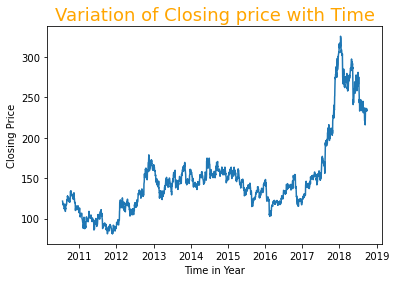

In [46]:
plt.plot(copy_df.Date, close_df)
plt.xlabel("Time in Year")
plt.ylabel("Closing Price");
plt.title("Variation of Closing price with Time",
          color="orange",
          fontsize=18);

# Step-5: Preprocessing by MinMax Scaler.

LSTM is very sensitive to small change in value and so to the scale of the data.
Thus, using MinMax Scaler, we scale it in the range of [0,1]

In [47]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range=(0,1)) # (0,1) by default.But mentioned for understanding
close_df = minmax.fit_transform(np.array(close_df).reshape(-1, 1))
close_df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# Step-6: Preparing train and test datasets.

We normally split dataset using train_test_split() or Cross validation


but for Time Series Datasets, we split manually in such a way that train datasets must have oldest data than that of test dataset

In [48]:
train_size = int(len(close_df)*0.7)
test_size = len(close_df) - train_size
train_data = close_df[:train_size, :] # Slicing row from 0 to train_size indexlocation but column is kept unsliced.
test_data = close_df[train_size:len(close_df), :1]

In [49]:
train_data.shape

(1424, 1)

In [50]:
test_data.shape

(611, 1)

In [51]:
test_data[:10]

array([[0.1621732 ],
       [0.15951797],
       [0.16707516],
       [0.15992647],
       [0.16053922],
       [0.16441993],
       [0.16687092],
       [0.1693219 ],
       [0.16074346],
       [0.15972222]])

## Preparing our dataset for training, fitting and testing of LSTM model



Suppose our dataset is: 122, 124, 135, 167, 187, 193, 199, 221, 228, 300
    
train_data = 122, 124, 135, 167, 187, 193

test_data =  199, 221, 228, 300

Then we need to prepare our dataset as:

    for time_steps = 3 
(By using past 3 values, we need to calculate present value)

    X          y 
 122 124 135   167
 124 135 167   187
 135 167 187   193

Similarly for test_data
#This function will create dataset as mentioned above


In [12]:
def create_dataset(dataset, time_step):
    X_data = []
    Y_data = []
    for i in range(len(dataset)-time_step-1):
        X_data.append(dataset[i:(i+time_step), 0])
        Y_data.append(dataset[i+time_step, 0])
    return np.array(X_data), np.array(Y_data)

In [52]:
# Reshaping into tuples of the form with X=t, t+1,..t+99 and Y=t+100 for time_step=100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [53]:
X_train.shape

(1323, 100)

In [54]:
y_train.shape

(1323,)

In [55]:
X_test.shape, y_test.shape

((510, 100), (510,))

# Finally completed my second task successfully
# Thanking to LetsGrowMore and Respected sir Aman Kesarwami for this
# golden opportunity to improve and enhance myself in the field of
# DataScience